<a href="https://colab.research.google.com/github/amohd63/ENCS5341-ML/blob/main/ENCS5341_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><h1>**Assignment #1**</h1></center>

In this assignment, we will study the dataset and analyze some of its aspects using $cars.csv$ file contains a dataset of cars concerning fuel consumption.

---

*First of all, we will import all required libraries.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Loading the dataset

In [ ]:
!rm -rf ./Datasets
!git clone https://github.com/amohd63/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 4.36 KiB | 4.36 MiB/s, done.


#### **1- Read the dataset and examine how many features and examples does it have?**

*(Hint: you can use $Pandas$ to load the dataset into a $dataframe$)*

In [ ]:
# Read the dataset using pandas
df = pd.read_csv("/content/Datasets/cars.csv", sep=",")

# Display some info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


We read the dataset successfully, and now we will analyze the displayed information.

---



*   $Entries$: the number of samples/examples in the dataset.
*   $Data$ $columns$: the number of features in the dataset.

Now, the table shows the features with their names, the number of non-null examples, and the type of its data.

The features we have in the dataset: *mgp, cylinders, displacement, horsepower, weight, acceleration, model_year, and origin*.

---

The number of **features** is **8**.

The number of **examples** is **398**.

---


Here, we will display some examples from the dataset:

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


#### **2- Are there features with missing values? How many missing values are there in each one?**

*(Hint: you can use $isnull()$ from $Pandas$)*

To check the if the dataset contains missing values (null), we use *isnull()* function, as follows:

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

The output above shows all features with the number of missing values.


For example, the following features doesn't have any missing value: *mgp, cylinders, displacement, weight, acceleration, and model_year*.


While, **horsepower** feature got **6** missing values, and **origin** has **2** missing.

In [ ]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,USA
39,14.0,8,400.0,175.0,4464,11.5,71,NaN
126,21.0,6,200.0,NaN,2875,17.0,74,USA
320,37.0,4,119.0,92.0,2434,15.0,80,NaN
330,40.9,4,85.0,NaN,1835,17.3,80,Europe
336,23.6,4,140.0,NaN,2905,14.3,80,USA
354,34.5,4,100.0,NaN,2320,15.8,81,Europe
374,23.0,4,151.0,NaN,3035,20.5,82,USA


The table above shows the rows/samples that got missing values.

#### **3- Fill the missing values in each feature using a proper imputation method (for example: fill with mean, median, or mode)**


##### **Handling $horsepower$ feature**

###### **Choosing suitable imputation method**

For *horsepower* feature, we must choose the most suitable measure for filling its missing values.

---

First of all, we will **display** its distrubtion to check if it's normal or not. After that, we will use **skewness** measure to check if it is normaly distrubted or not.

<Axes: xlabel='horsepower', ylabel='Count'>

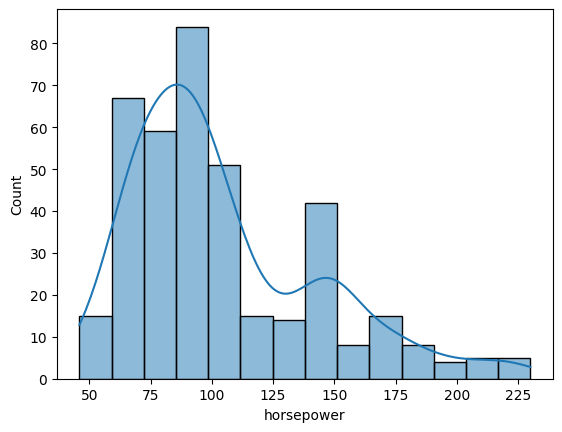

In [ ]:
sns.histplot(data=df, x="horsepower", kde=True)

Now, we will measure the skewness.

In [ ]:
df['horsepower'].skew()

1.0873262824048695

The **skewness** of **horsepower** feature is *1.0873262824048695*, which is a positive number. According to skewness measures, if the number is positive, then the tail is longer on the right side (right-skewed).

**Note**:
- If skewness is close to 0, the distribution is approximately symmetric.
- If skewness is negative, the tail is longer on the left side (left-skewed).
- If skewness is positive, the tail is longer on the right side (right-skewed).

---

As a result, we will use **median** to impute the missing values, since it is the most suitable for skewed distribution.

###### **Filling missing values**

Calcaute the median

In [ ]:
median = df['horsepower'].median()
print("Median of horsepower: ", median)

Median of horsepower:  93.5


Fill the missing values of horsepower.

In [ ]:
# Fill the horsepower missing values with the value of the median
df['horsepower'].fillna(value=median, inplace=True)

Ensure that the horsepower is filled with the median.

In [ ]:
print("Number of missing values in horsepower: ", df['horsepower'].isnull().sum())

Number of missing values in horsepower:  0


##### **Handling $origin$ feature**

###### **Choosing suitable imputation method**

**Origin** feature is categorical, the most suitable method for categorical data is **mode**.

We will display the origin to find the most frequent country.

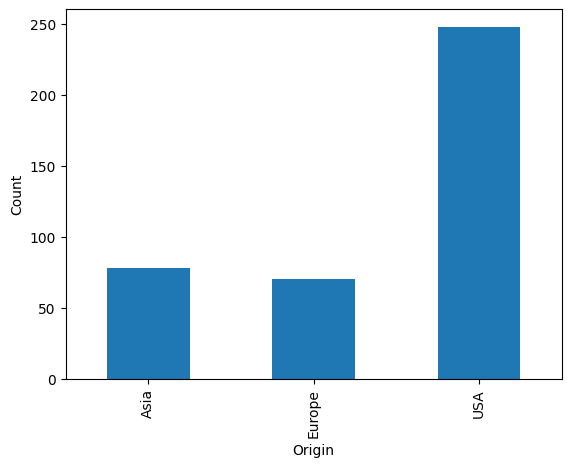

In [ ]:
df_origin = df.groupby('origin')['mpg'].count()

# Creating a bar plot
df_origin.plot(kind='bar')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

Find the **mode** of **origin** feature.

In [ ]:
mode = df['origin'].mode().values[0]
print("The most frequent value is: ", mode)

The most frequent value is:  USA


Both ways resulted in ***USA*** as the mode.

###### **Filling missing values**

Filling the missing values using found mode value.

In [ ]:
# Fill the origin missing values with the value of the mode
df['origin'].fillna(value=mode, inplace=True)

Ensure that the origin is filled with the mode.

In [ ]:
print("Number of missing values in origin: ", df['origin'].isnull().sum())

Number of missing values in origin:  0


#### **4- Which country produces cars with better fuel economy?**

*(Hint: use box plot that shows the mpg for each country (all countries in one plot))*

First we must know what **boxplot** is.

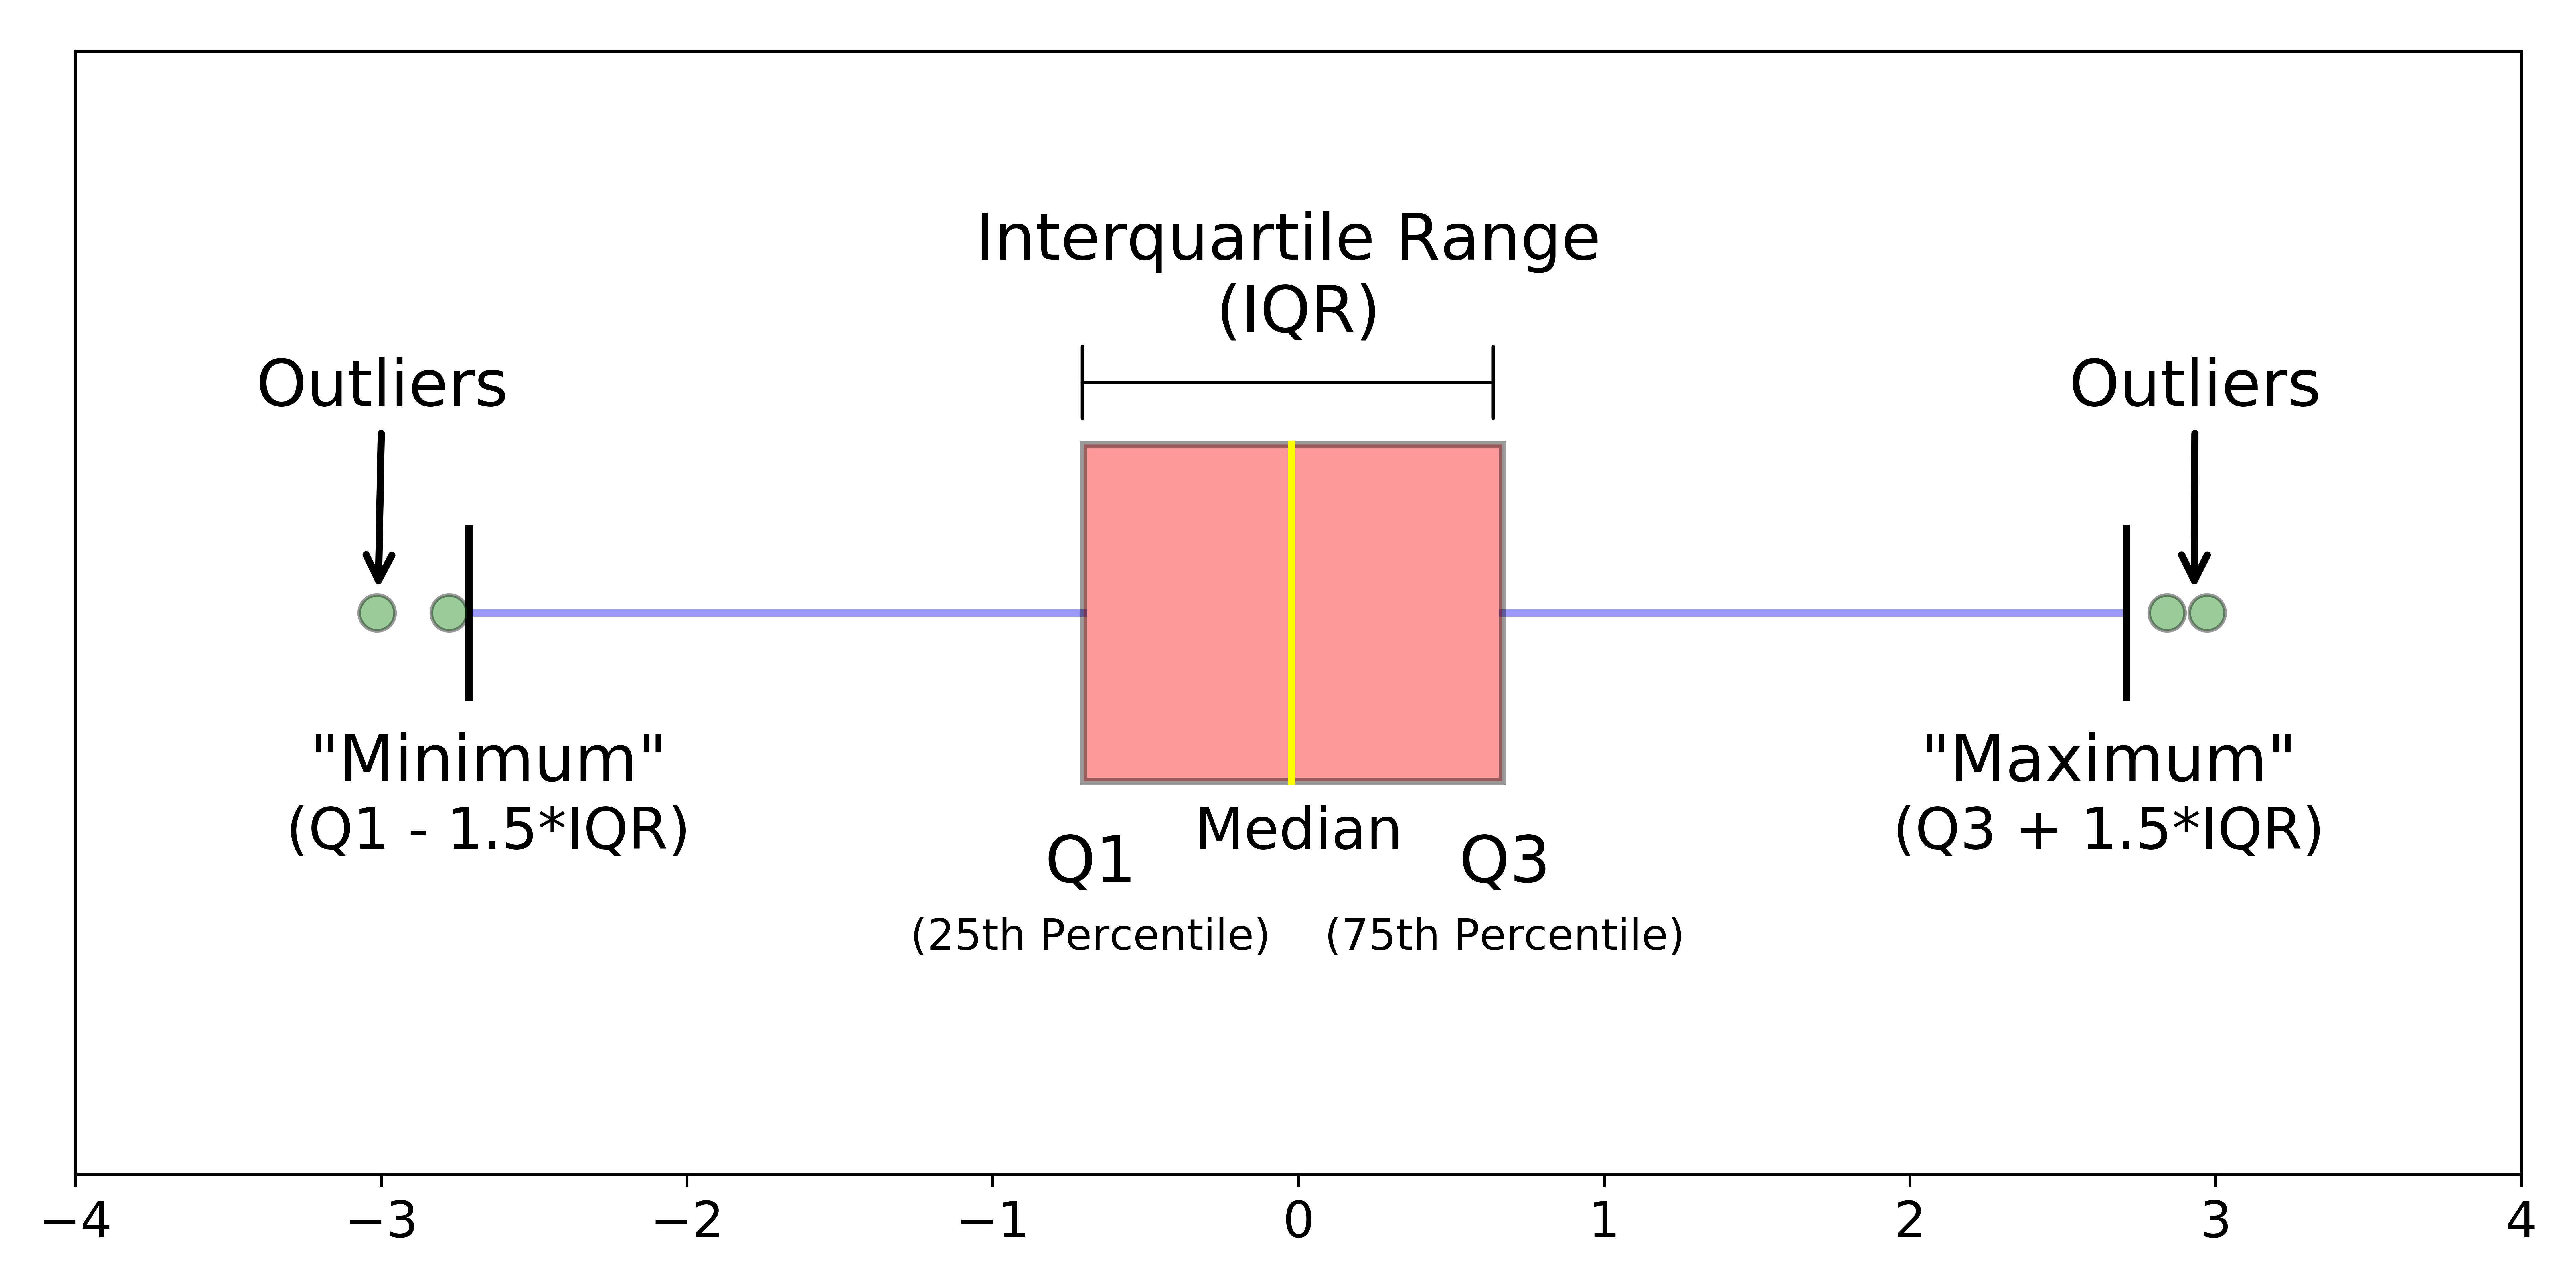

In this part, we focus on the **yellow** line which is the value of the **median**.

So, the country that produces cars with better furl economy is the one with the highest **mpg** median.

**MPG** stands for *mile per galon*, higher value of *mpg* indicates a better fuel economy.

---

The following is the required plot:

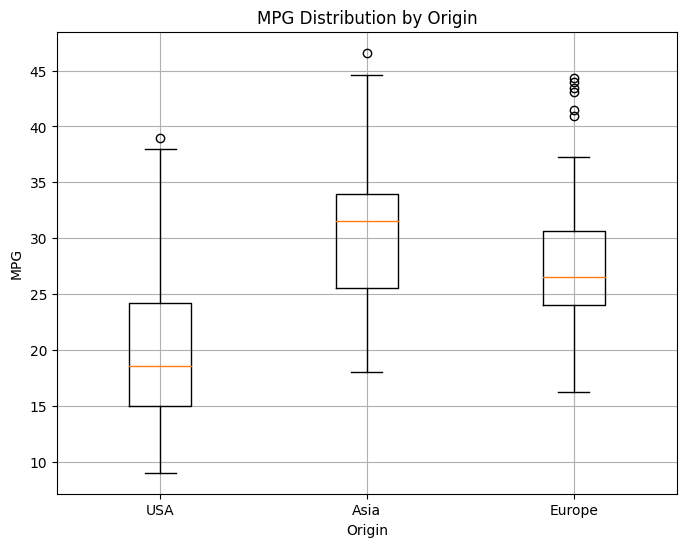

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['origin'] == country]['mpg'] for country in df['origin'].unique()],
            labels=df['origin'].unique())
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.title('MPG Distribution by Origin')
plt.grid(True)
plt.show()

From the graph, we have **3** origins **[USA, Asia, Europe]**, each boxplot got an orange line which is the value of the **median**. So in our case, the highest line (**median value**) is for **Asia**.

#### **5- Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.**

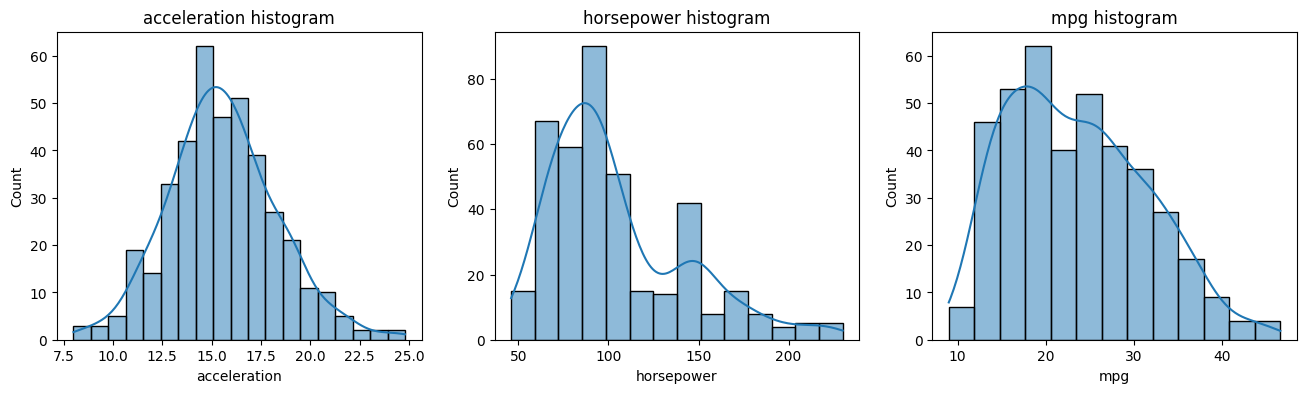

In [ ]:
features = ['acceleration', 'horsepower', 'mpg']
fig, axs = plt.subplots(figsize=(16, 4), ncols=len(features))

for i, feature in enumerate(features):
  sns.histplot(data=df, x=feature, kde=True, ax=axs[i])
  axs[i].set_title(str(feature) + ' histogram')

From the plots above, **accleration** is the most similar to **gaussian**.

#### **6- Support your answer for part 5 by using a quantitative measure.**

We will use skewness measure for this part.

In [ ]:
# Calculate the Skewness for each column in the DataFrame
Skewness = df[features].skew()

# Create a DataFrame combining column names and skewness values
skewness_df = pd.DataFrame({'Feature': Skewness.index, 'Skewness Value': Skewness.values})

# Print the DataFrame
print(skewness_df)

        Feature  Skewness Value
0  acceleration        0.278777
1    horsepower        1.106224
2           mpg        0.457066


The smallest skewness value is the best. From the result above, **acceleration** has the smallest value which means it is the nearest to gaussian.

#### **7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?**

<Axes: xlabel='horsepower', ylabel='mpg'>

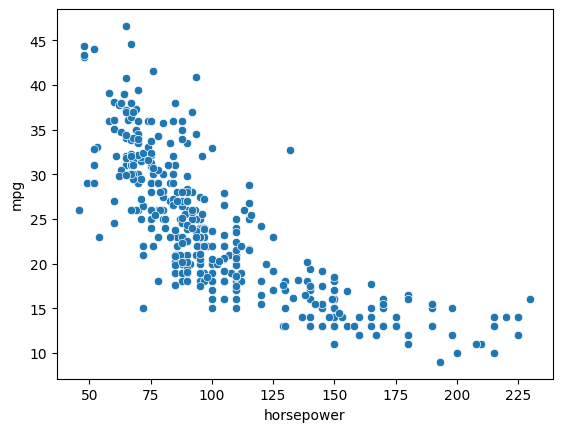

In [ ]:
sns.scatterplot(data=df, x="horsepower", y="mpg")

To find the correlation between **horsepower** and **mpg**, we use **Pearson’s r correlation** formula, the formula as follows:

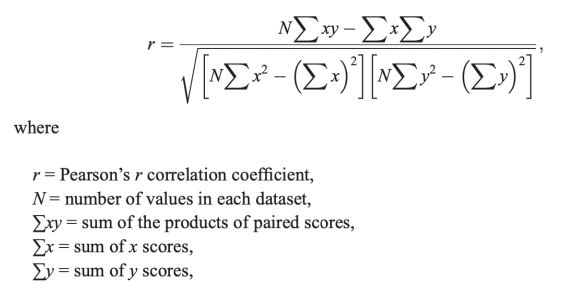

Now, for this formula we can use **4** different methods the calculates **r correlation**, as follows:

This is the first method, the function is implemented manually.

In [ ]:
def calculate_pearson_correlation(x, y):
    N = len(x)

    numerator = (N * sum(np.multiply(x, y))) - (sum(x) * sum(y))

    denominator = np.sqrt(
        ((N * sum(np.power(x, 2))) - sum(x) ** 2)
        *
        ((N * sum(np.power(y, 2))) - sum(y) ** 2)
    )

    r = numerator/denominator

    return r

correlation = calculate_pearson_correlation(df['horsepower'], df['mpg'])
print(f"Pearson's correlation coefficient: {correlation}")

Pearson's correlation coefficient: -0.773453204574217


Second method, using $corr()$ method.

In [ ]:
correlation = df['horsepower'].corr(df['mpg'])
print(f"Pearson's correlation coefficient: {correlation}")

Pearson's correlation coefficient: -0.7734532045742156


Third method, using $pearsonr()$.

In [ ]:
correlation = pearsonr(df['horsepower'], df['mpg'])[0]
print(f"Pearson's correlation coefficient: {correlation}")

Pearson's correlation coefficient: -0.7734532045742154


Why I used **[0]**?

---

*Note*: $personr()$ *returns an object that contains two values in form of:*

<center>$PearsonRResult(statistic=a, pvalue=b)$</center>

Where:

    1.   statistic: the correlation coefficient
    2.   pvalue: the p-value

**P-value** is used in statistical methods when you’re testing a hypothesis.

Fourth, using $corrcoef()$.

In [ ]:
correlation_table = np.corrcoef(df['horsepower'], df['mpg'])

row_labels = ['horsepower', 'mpg']
column_labels = ['horsepower', 'mpg']

# Create a DataFrame
table = pd.DataFrame(correlation_table, index=row_labels, columns=column_labels)

# Print the DataFrame
print(table)

            horsepower       mpg
horsepower    1.000000 -0.773453
mpg          -0.773453  1.000000


*Note:* **np.corrcoef()** returns a matrix/table that contains the correlation between:

*   horsepower & horsepower
*   horsepower & mpg
*   mpg & mpg
*   mpg & horsepower

Where the order is important, but in this case both (**horsepower & mpg**) and (**mpg & horsepower**) have the same correlation.

---

So, to find the **r correlation**, we can simply do the following instead of observing the whole matrix:

In [ ]:
correlation = correlation_table[0, 1]
print(f"Pearson's correlation coefficient: {correlation}")

Pearson's correlation coefficient: -0.7734532045742156


After all, I just mentioned different ways of calculating the **r correlation**. For now, the value of r is:

<center>$r=-0.7734532045742156$</center>

However, there is a ***strong correlation*** between **horsepower** and **mpg**, and the value is **negative** as found earlier.

The following image shows the range of **r** values with their correlation power.

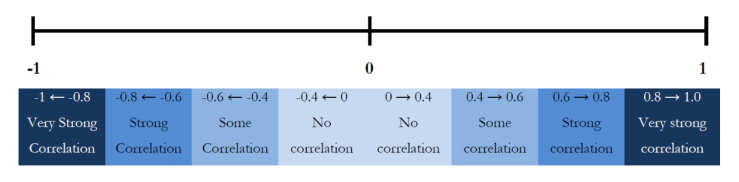

#### **8- Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7.**

*(Hint: This is a simple linear regression problem (one feature). Do not forget to add $x_{0}=1$ for the intercept. For inverting a matrix use np.linalg.inv from NumPy)*

<center>$f$ = $w_{o}$ + $w_{1}$$x$</center>

<center>$w$ = $(X^{T}$ $X)$$^{-1}$ $X^{T}$ $y$</center>

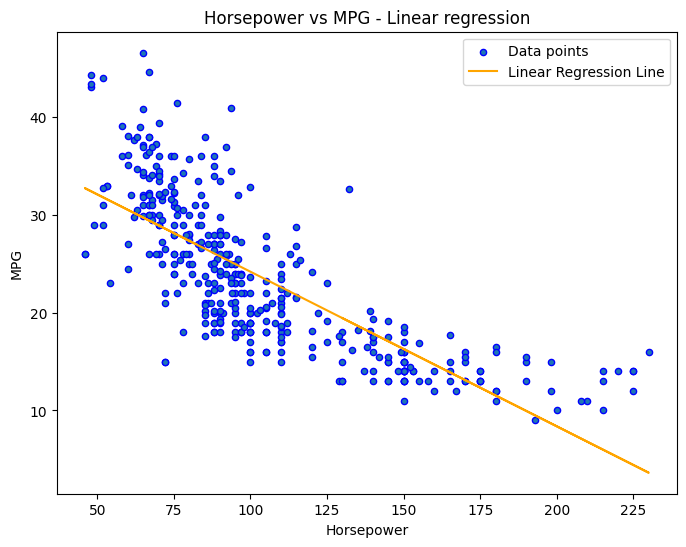

In [ ]:
# Implement closed form solution of linear regression
# Add x0=1 for the intercept
X = np.column_stack((np.ones(len(df)), df['horsepower']))
y = df['mpg']
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

# Predict 'mpg' using the learned model
predicted_mpg = theta[0] + theta[1] * df['horsepower']

# Create a scatter plot of 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
plt.scatter(df['horsepower'], df['mpg'], edgecolor="b", s=20, label='Data points')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG - Linear regression')

# Plot the learned line on the scatter plot
plt.plot(df['horsepower'], predicted_mpg, color='orange', label='Linear Regression Line')
plt.legend()
plt.show()

Print the calculated weights aka. coefficient and intercept.

In [ ]:
print(f"w0: {theta[0]}, w1: {theta[1]}")

w0: 40.01131787111278, w1: -0.15816020313402746


<center>$f$ = $40.01131787111278$ - $0.15816020313402746$$x$</center>

 In linear regression, the goal is to find the best-fitting straight line that describes the relationship between two variables. In this case, we're exploring the relationship between 'Horsepower' and 'MPG'.

 The orange line depicted in the graph represents the result of linear regression. It's a line that minimizes the overall distance between itself and the actual data points, aiming to capture the general trend or pattern (or function) in the data.



Alternativly, we can use $scikit-learn$ library, $LinearRegression$, for this part as follows:

<ipython-input-69-f16cd840bfb3>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  linear_regression.fit(X[:, np.newaxis], y)
<ipython-input-69-f16cd840bfb3>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, linear_regression.predict(X[:, np.newaxis]), label="Model", color='orange')


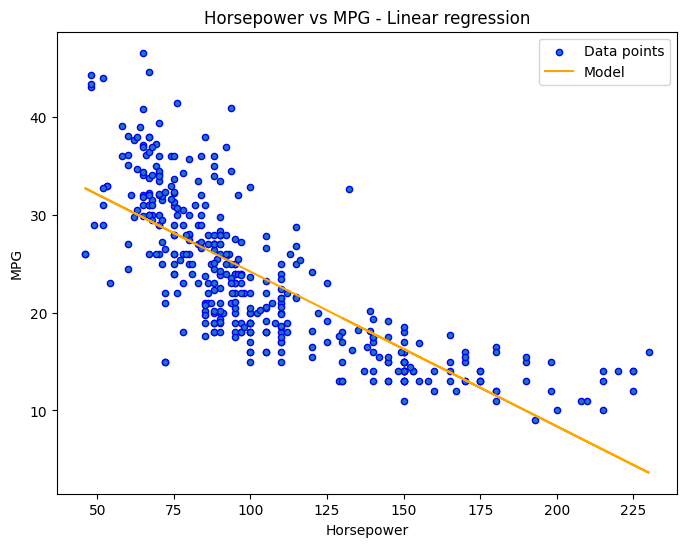

In [ ]:
X = df['horsepower']
y = df['mpg']

linear_regression = LinearRegression()
linear_regression.fit(X[:, np.newaxis], y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, edgecolor="b", s=20, label="Data points")
plt.plot(X, linear_regression.predict(X[:, np.newaxis]), label="Model", color='orange')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG - Linear regression')
plt.legend(loc="best")
plt.show()

In [ ]:
mse = mean_squared_error(y, predicted_mpg)
print("Mean Squared Error (Implemented algorithm):", mse)

Mean Squared Error (Implemented algorithm): 24.482313198511783


In [ ]:
mse = mean_squared_error(y, linear_regression.predict(X[:, np.newaxis]))
print("Mean Squared Error (scikit−learn model):", mse)

Mean Squared Error (scikit−learn model): 24.482313198511783


<ipython-input-73-176643b340b3>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mse = mean_squared_error(y, linear_regression.predict(X[:, np.newaxis]))


Now, we are checking if the implemented algorithm is correct or not. This is done by calculating the MSE on both. It is clear that the result of MSE on both models is the same.

#### **9- Repeat part 8 but now learn a quadratic function of the form**

<center>$f$ = $w_{o}$ + $w_{1}$$x$ + $w_{2}$$x^{2}$</center>

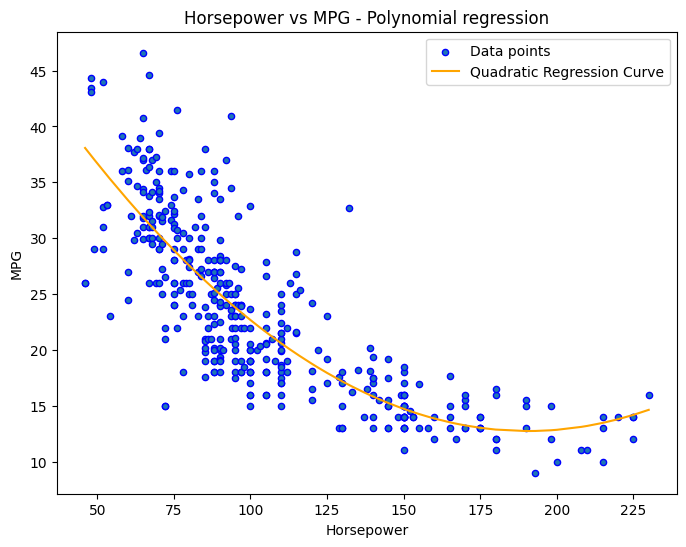

In [ ]:
# Implement quadratic function for linear regression
# Create the feature matrix with the quadratic term
df_sorted = df.sort_values('horsepower')

X = np.column_stack((np.ones(len(df)), df_sorted['horsepower'], df_sorted['horsepower'] ** 2))
y = df_sorted.sort_values('horsepower')['mpg']

# Calculate the parameters using closed form solution
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

# Predict 'mpg' using the learned model
#horsepower = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
predicted_mpg = theta[0] + theta[1] * df_sorted['horsepower'] + theta[2] * df_sorted['horsepower'] ** 2

# Create a scatter plot of 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['horsepower'], df_sorted['mpg'], edgecolor="b", s=20, label='Data points')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG - Polynomial regression')

# Plot the learned curve on the scatter plot
plt.plot(df_sorted['horsepower'], predicted_mpg, color='orange', label='Quadratic Regression Curve')
plt.legend()
plt.show()

Print the calculated weights aka. coefficients and intercept.

In [ ]:
print(f"w0: {theta[0]}, w1: {theta[1]}, w2: {theta[2]}")

w0: 56.78120816038119, w1: -0.46256337916236057, w2: 0.001214317725760493


<center>$f$ = $56.78120816038119$ - $0.46256337916236057$$x$ + $0.001214317725760493$$x^{2}$</center>

Now, when using quadratic non-linear regression, it is clear the the predicted line fits the data better since it takes more data points into consideration.

Alternativly, we can use built-in method as follows:

<ipython-input-75-bb73cb3127eb>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  q_model.fit(polynomial_features.fit_transform(X[:, np.newaxis]), y)
<ipython-input-75-bb73cb3127eb>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, q_model.predict(polynomial_features.fit_transform(X[:, np.newaxis])), label="Model", color='orange')


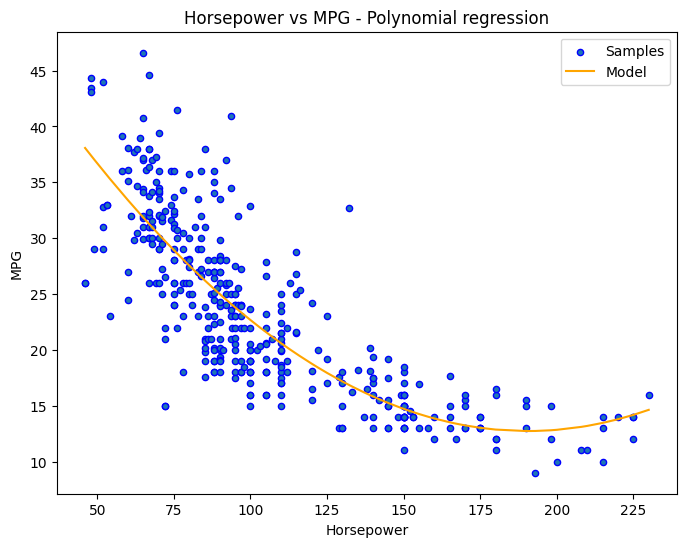

In [ ]:
X = df_sorted['horsepower']
y = df_sorted['mpg']

polynomial_features = PolynomialFeatures(2, include_bias=True)

q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X[:, np.newaxis]), y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.plot(X, q_model.predict(polynomial_features.fit_transform(X[:, np.newaxis])), label="Model", color='orange')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG - Polynomial regression')
plt.legend(loc="best")
plt.show()

In [ ]:
mse = mean_squared_error(y, predicted_mpg)
print("Mean Squared Error (Implemented algorithm):", mse)

Mean Squared Error (Implemented algorithm): 19.708332310890942


In [ ]:
mse = mean_squared_error(y, q_model.predict(polynomial_features.fit_transform(X[:, np.newaxis])))
print("Mean Squared Error (scikit−learn model):", mse)

Mean Squared Error (scikit−learn model): 19.708332310890942


<ipython-input-77-86d6a9929fd8>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mse = mean_squared_error(y, q_model.predict(polynomial_features.fit_transform(X[:, np.newaxis])))


First of all, our implemented algorithm gave the same result as the library's model.

Secondly, we can ensure that the quadratic regression fits the data better due to the improvement on the value of MSE, we notice a drop from 24.48 to 19.71.

#### **10- Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.**

Gradient descent is a vital technique in linear regression used to minimize the error between predicted and actual values by iteratively adjusting coefficients. It optimizes the model by gradually updating coefficients. This iterative approach efficiently finds the best-fitting line or hyperplane, particularly beneficial in high-dimensional spaces or when dealing with large datasets where analytical solutions may be impractical. Its versatility extends beyond linear regression, making it a widely applied optimization method across various machine learning models, contributing to effective and efficient parameter optimization and model training.

For this part, we have three important **equations** that will be used in finding the weights used in the model. The equations are lined in red color.

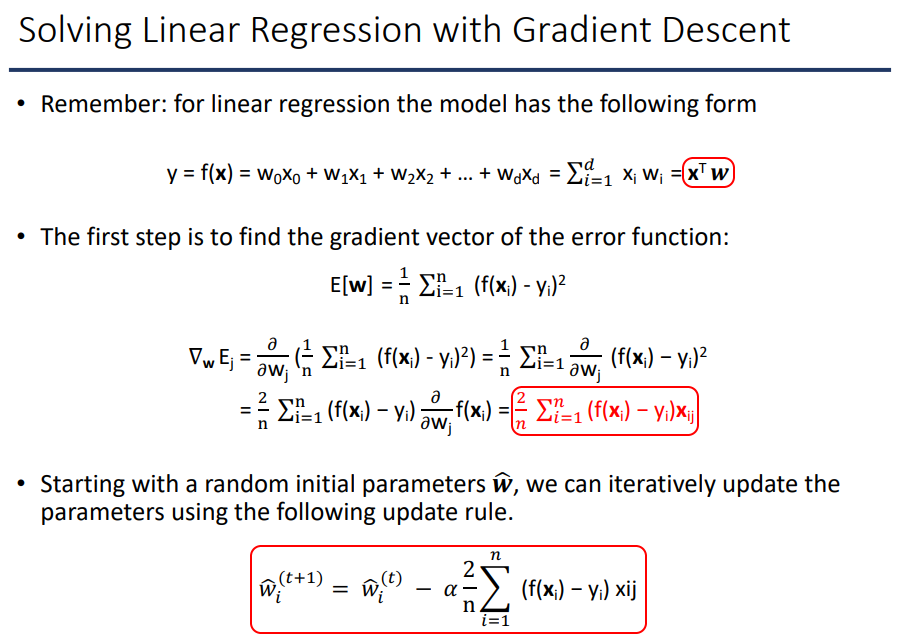

First, we start by setting the values of X & y.

In [ ]:
# Implement linear regression using gradient descent
X = np.column_stack((np.ones(len(df)), df_sorted['horsepower']))
y = df_sorted['mpg']

Then, we set the required parameters, such as: **learning rate, epochs**, and **n** (*# examples*).

In [ ]:
# Hyperparameters
learning_rate = 0.00001
epochs = 100
n = len(y)

After that, we initialize weights by setting default values for them.

In [ ]:
# Initialize weights (parameters)
theta = [40, -1.4969109999]

Note: the values where chosen after testing them and calculating the MSE, these values [learning_rate, epochs, theta] approximatly gave the smallest MSE. As long as you increase the number of **epochs**, there are no effect on the model.

Finding the weights using gradient descent.

In [ ]:
# Gradient Descent
for i in range(epochs):
    # Calculate predictions
    predictions = np.dot(X, theta)

    # Calculate error
    error = predictions - y

    # Calculate gradients
    gradients = 2 * np.dot(X.T, error) / n

    # Update parameters (weights)
    theta -= learning_rate * gradients

Finding the equation of the trained model.

In [ ]:
# Predict 'mpg' using the learned model
predicted_mpg = theta[0] + theta[1] * df_sorted['horsepower']

Plot the scatter of the original data along with the model line.

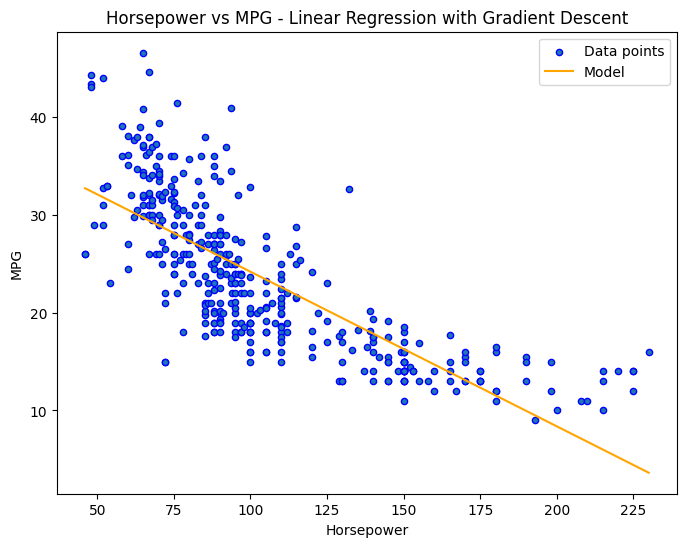

In [ ]:
# Create a scatter plot of 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['horsepower'], df_sorted['mpg'], edgecolor="b", s=20, label='Data points')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG - Linear Regression with Gradient Descent')

# Plot the learned line on the scatter plot
plt.plot(df_sorted['horsepower'], predicted_mpg, color='orange', label='Model')
plt.legend()
plt.show()

Print the calculated weights aka. coefficients and intercept.

In [ ]:
print(f"w0: {theta[0]}, w1: {theta[1]}")

w0: 40.01131901158941, w1: -0.15816021277731174


<center>$f$ = $40.01131901158941$ - $0.15816021277731174$$x$</center>

Calculating the **MSE**.

In [ ]:
mse = mean_squared_error(y, predicted_mpg)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.482313198511935


To sum up, we got nearly the same result as obesrved in part 8. The difference in the MSE value is due to the values of the initial weights.

---

##### **Choosing the values of parameters (epochs, learning rate, initial weights)**

This stage aims to find the suitable values for initial weights.

In [ ]:
# Implement linear regression using gradient descent
X = np.column_stack((np.ones(len(df)), df_sorted['horsepower']))
y = df_sorted['mpg']

# Hyperparameters
learning_rate = 0.00001
epochs = 100
n = len(y)

# Initialize weights (parameters)
theta = [40, -1.4969109999]

# Gradient Descent
for i in range(epochs):
    # Calculate predictions
    predictions = np.dot(X, theta)

    # Calculate error
    error = predictions - y

    # Calculate gradients
    gradients = 2 * np.dot(X.T, error) / n

    # Update parameters (weights)
    theta -= learning_rate * gradients

# Predict 'mpg' using the learned model
predicted_mpg = theta[0] + theta[1] * df_sorted['horsepower']
mse = mean_squared_error(y, predicted_mpg)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.482313198511935


The initial weights are chosen by randomly increasing them starting from w = [0, 0]. I increased the first weight to [10, 0] and noticed an improvement in the value of MSE. Kept increasing it till it reached 40. Then, I wanted to decrease the value of MSE, so I started changing the second weight. The value of MSE didn't improve at all as the second weight increased. So, I decided to decrease it step by step till I reached these weights.

Finding the learning rate and the number of epochs.

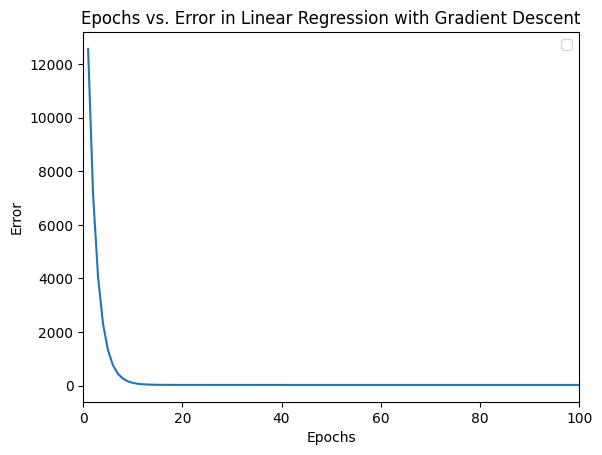

In [ ]:
# Implement linear regression using gradient descent
X = np.column_stack((np.ones(len(df)), df_sorted['horsepower']))
y = df_sorted['mpg']

# Hyperparameters
learning_rate = 0.00001
epochs = 1000
n = len(y)

# Initialize weights (parameters)
theta = [40, -1.4969109999]

errors = []

# Gradient Descent
for i in range(epochs):
    # Calculate predictions
    predictions = np.dot(X, theta)

    # Calculate error
    error = predictions - y

    # Calculate gradients
    gradients = 2 * np.dot(X.T, error) / n

    # Update parameters (weights)
    theta -= learning_rate * gradients

    # Predict 'mpg' using the learned model
    predicted_mpg = theta[0] + theta[1] * df_sorted['horsepower']

    errors.append(mean_squared_error(y, predicted_mpg))

plt.plot(range(1, epochs+1), errors)
plt.legend()
plt.xlim(0, 100)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error in Linear Regression with Gradient Descent')
plt.show()

The error is nearly constant after 20 epochs. However, the difference in error between epochs (100-20) is 0.26 which is very small. However, for better accuracy the chosen number for epochs is 100.

The learning rate was tuned until the values above were observed.